# Chest X-ray Classification

The project architecture is as follows:

| Root | Directory / File | Description |
|------|------------------|-------------|
| `./` | `config.py` | Configuration file for the project. |
| `./` | `main.ipynb` | Main Jupyter notebook for running the project. |
| `src/` | `models/` | Directory containing model definitions. |
| `src/` | `datasets/` | Directory containing dataset definitions. |
| `src/` | `utils/` | Directory containing utility functions. | 

![Chest X-ray Classification Architecture](./architecture.png "Chest X-ray Classification Architecture")

## Installations

The project use Python 3.12.9

You can found urls to download the datasets in the `datasets_urls.txt` file

In [1]:
%pip install -qr ./requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal


# Import project modules
import config
import src.utils.display as display
import src.datasets.datasetHelper as datasetHelper
import src.datasets.SKDataLoader as SKDataLoader
import src.datasets.TFDataLoader as TFDataLoader

# Import all model types
from sklearn.metrics import confusion_matrix
import src.models.common.SKModelInterface as SKModelInterface
import src.models.CNNModel as CNNModel
import src.models.ForestModel as ForestModel
import src.models.KNNModel as KNNModel
import src.models.SVMModel as SVMModel

2025-07-01 11:16:11.151967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751361371.195266     591 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751361371.207536     591 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751361371.296322     591 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751361371.296347     591 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751361371.296348     591 computation_placer.cc:177] computation placer alr

## Config Loading and Visualization


Displaying class help: True
Dataset structure:
 - NORMAL images: data/chest_Xray/train/NORMAL
 - PNEUMONIA images (Bacteria & virus): data/chest_Xray/train/PNEUMONIA

Showing NORMAL images...


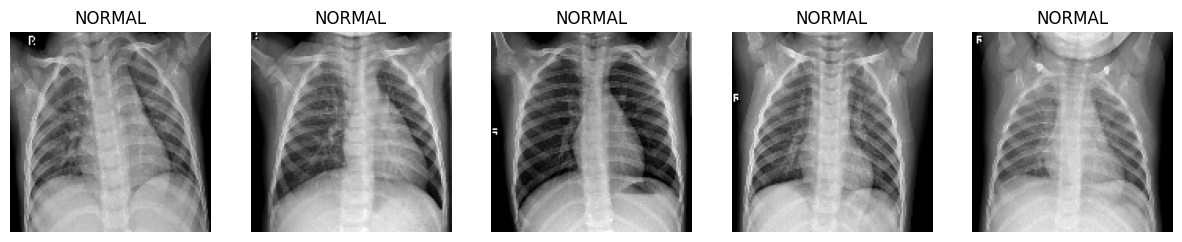


Showing BACTERIA images...


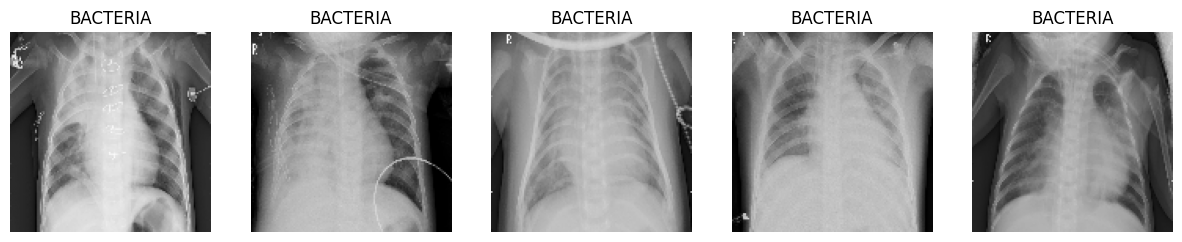


Showing VIRUS images...


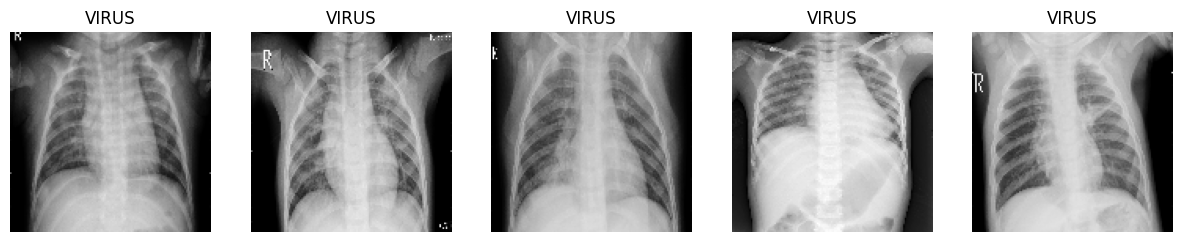

In [3]:
from config import DISPLAY_CLASS_HELP
importlib.reload(config)

print("Displaying class help:", DISPLAY_CLASS_HELP)

print("Dataset structure:")
print(f" - NORMAL images: {config.TRAIN_PATH / 'NORMAL'}")
print(
    f" - PNEUMONIA images (Bacteria & virus): {config.TRAIN_PATH / 'PNEUMONIA'}")

# Visualize sample images from each class
importlib.reload(display)
display.show_sample_images(3, category="train")

## Data Preparation

In [4]:
importlib.reload(datasetHelper)
importlib.reload(TFDataLoader)
importlib.reload(SKDataLoader)

if DISPLAY_CLASS_HELP:
    help(datasetHelper)
    help(TFDataLoader)
    help(SKDataLoader)

(x_tf_train, y_tf_train), (x_tf_test, y_tf_test) = TFDataLoader.load_data()

(x_sk_train, y_sk_train), (x_sk_test, y_sk_test) = SKDataLoader.load_data()

Help on module src.datasets.datasetHelper in src.datasets:

NAME
    src.datasets.datasetHelper

FUNCTIONS
    categorize_labels(**y: numpy.ndarray[typing.Any, numpy.dtype[numpy.float32]]) -> list[numpy.ndarray[typing.Any, numpy.dtype[numpy.float32]]]
        Resize labels to categorical format.

    load_dataset(category: Literal['train', 'test'] = 'train', flatten: bool = False, print_repartition: bool = False) -> tuple[numpy.ndarray[typing.Any, numpy.dtype[numpy.float32]], numpy.ndarray[typing.Any, numpy.dtype[numpy.float32]]]
        Load images from NORMAL, BACTERIA, and VIRUS classes.

        Args:
            category (str): The category of images to load (train or test).
            flatten (bool): Whether to flatten the images or not.
            print_repartition (bool): Whether to print the class distribution.

        Returns:
            tuple (ndarray, ndarray): A tuple containing the images and their corresponding labels.

    resize_images(**x: numpy.ndarray[typing.Any

I0000 00:00:1751361393.377854     591 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6166 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Loading training data...
Class distribution in train: {'NORMAL': 1341, 'BACTERIA': 2530, 'VIRUS': 1345}
Loading test data...
Class distribution in test: {'NORMAL': 234, 'BACTERIA': 242, 'VIRUS': 148}
Data loading complete!
Applying data augmentation...


## Model Training and Evaluation

### CNN Model training

In [5]:
importlib.reload(CNNModel)

tf_models: list[CNNModel.CNNModel] = [
    CNNModel.CNNModel()
]

tf_scores: list[dict[Literal["accuracy", "precision", "recall",
                             "f1_score"], float | np.floating | np.ndarray]] = []

tf_datas: list[dict[Literal["predictions", "y_true"], np.ndarray]] = []

for model in tf_models:
    print("\n" + "="*50)

    print(model.name + " MODEL TRAINING")

    print("="*50)

    if (config.DISPLAY_CLASS_HELP):
        help(model)

    print(model.summary())

    model.fit(x_tf_train, y_tf_train)

    [score, data] = model.evaluate(x_tf_test, y_tf_test)
    tf_scores.append(score)
    tf_datas.append(data)

/home/rafi_epitech/Documents/Projects/Epitech/T-DEV-810-NAN_7/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



CNNModel MODEL TRAINING
Help on CNNModel in module src.models.CNNModel object:

class CNNModel(src.models.common.ModelInterface.ModelInterface)
 |  Defines the neural network architecture and prepares it for training.
 |
 |  - Sets up data augmentation to artificially expand the training dataset.
 |  - Creates a multi-layer CNN with 4 convolutional blocks (32→64→128→256 filters).
 |  - Uses BatchNormalization and Dropout layers to prevent overfitting.
 |  - Compiles the model with Adam optimizer and categorical cross-entropy loss.
 |  - Calculates class weights to handle class imbalance in the dataset.
 |
 |  The model is designed to classify chest X-rays into NORMAL, BACTERIA, and VIRUS categories using the grayscales images.
 |
 |  It is a Keras Sequential model so it needs to use the TFDataset (3 dimensions).
 |
 |  Method resolution order:
 |      CNNModel
 |      src.models.common.ModelInterface.ModelInterface
 |      abc.ABC
 |      builtins.object
 |
 |  Methods defined here:
 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 5,369,955 (20.48 MB)

 Trainable params: 5,368,483 (20.48 MB)

 Non-trainable params: 1,472 (5.75 KB)

None
(10432, 128, 128, 1)
Epoch 1/30


I0000 00:00:1751361420.789755     713 service.cc:152] XLA service 0x7ff3f401d620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751361420.789782     713 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-07-01 11:17:00.895873: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751361421.545914     713 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/218 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.2812 - loss: 2.1843  

I0000 00:00:1751361431.123354     713 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4978 - loss: 1.2579
Epoch 1: val_accuracy improved from -inf to 0.21449, saving model to best_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.4980 - loss: 1.2571 - val_accuracy: 0.2145 - val_loss: 1.9219 - learning_rate: 1.0000e-04
Epoch 2/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6144 - loss: 0.8788
Epoch 2: val_accuracy did not improve from 0.21449
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6146 - loss: 0.8787 - val_accuracy: 0.2145 - val_loss: 1.8604 - learning_rate: 1.0000e-04
Epoch 3/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6678 - loss: 0.7745
Epoch 3: val_accuracy improved from 0.21449 to 0.22944, saving model to best_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6678 - loss: 0.7744 - val_accuracy: 0.2294 - val_loss: 1.5323 - learning_rate: 1.0000e-04
Epoch 4/30
216/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6716 - loss: 0.7183
Epoch 4: val_accuracy improved from 0.22944 to 0.57102, saving model to best_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6716 - loss: 0.7182 - val_accuracy: 0.5710 - val_loss: 0.8372 - learning_rate: 1.0000e-04
Epoch 5/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7102 - loss: 0.6559
Epoch 5: val_accuracy did not improve from 0.57102
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7101 - loss: 0.6560 - val_accuracy: 0.3634 - val_loss: 1.1634 - learning_rate: 1.0000e-04
Epoch 6/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7160 - loss: 0.6300
Epoch 6: val_accuracy improved from 0.57102 to 0.60265, saving model to best_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7160 - loss: 0.6299 - val_accuracy: 0.6026 - val_loss: 0.7856 - learning_rate: 1.0000e-04
Epoch 7/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7211 - loss: 0.5874
Epoch 7: val_accuracy improved from 0.60265 to 0.76366, saving model to best_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7211 - loss: 0.5874 - val_accuracy: 0.7637 - val_loss: 0.5199 - learning_rate: 1.0000e-04
Epoch 8/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7311 - loss: 0.5960
Epoch 8: val_accuracy did not improve from 0.76366
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7310 - loss: 0.5960 - val_accuracy: 0.7059 - val_loss: 0.6219 - learning_rate: 1.0000e-04
Epoch 9/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7323 - loss: 0.5732
Epoch 9: val_accuracy did not improve from 0.76366
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7323 - loss: 0.5732 - val_accuracy: 0.7315 - val_loss: 0.5853 - learning_rate: 1.0000e-04
Epoch 10/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7434 - loss: 0.5612
Epoch 10: val_accuracy improved from 0.76366 to 0.79816, saving model to best_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7434 - loss: 0.5612 - val_accuracy: 0.7982 - val_loss: 0.4564 - learning_rate: 1.0000e-04
Epoch 11/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7488 - loss: 0.5223
Epoch 11: val_accuracy improved from 0.79816 to 0.80420, saving model to best_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7488 - loss: 0.5223 - val_accuracy: 0.8042 - val_loss: 0.4493 - learning_rate: 1.0000e-04
Epoch 12/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7595 - loss: 0.5109
Epoch 12: val_accuracy improved from 0.80420 to 0.81369, saving model to best_model.h5


218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7594 - loss: 0.5110 - val_accuracy: 0.8137 - val_loss: 0.4203 - learning_rate: 1.0000e-04
Epoch 13/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7657 - loss: 0.4794
Epoch 13: val_accuracy did not improve from 0.81369
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7657 - loss: 0.4795 - val_accuracy: 0.8030 - val_loss: 0.4469 - learning_rate: 1.0000e-04
Epoch 14/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7643 - loss: 0.4824
Epoch 14: val_accuracy did not improve from 0.81369
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7644 - loss: 0.4823 - val_accuracy: 0.7936 - val_loss: 0.4695 - learning_rate: 1.0000e-04
Epoch 15/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7661 - loss: 0.4716
Epoch 15: val_accuracy did not improve from 0.81369
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7662 - loss: 0.4715 - val_accuracy: 0.8071 - val_loss: 0.4516 - learning_rate: 1.0000e

218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.8981 - loss: 0.2199 - val_accuracy: 0.8185 - val_loss: 0.4426 - learning_rate: 1.0000e-04
Epoch 12/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8978 - loss: 0.2221
Epoch 12: val_accuracy did not improve from 0.81852
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.8978 - loss: 0.2222 - val_accuracy: 0.7785 - val_loss: 0.5489 - learning_rate: 1.0000e-04
Epoch 13/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9056 - loss: 0.2080
Epoch 13: val_accuracy did not improve from 0.81852
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9055 - loss: 0.2081 - val_accuracy: 0.8073 - val_loss: 0.4700 - learning_rate: 1.0000e-04
Epoch 14/30
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9056 - loss: 0.2104
Epoch 14: val_accuracy did not improve from 0.81852
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9056 - loss: 0.2104 - val_accuracy: 0.8033 - val_loss: 0.4759 - learning_rate: 1.0000e

### Scikit-Learn Models training

In [6]:
importlib.reload(SKModelInterface)
importlib.reload(ForestModel)
importlib.reload(SVMModel)
importlib.reload(KNNModel)

sk_models: list[SKModelInterface.SKModelInterface] = [
    KNNModel.KNNModel(),
    ForestModel.ForestModel(), SVMModel.SVMModel()
]

sk_scores: list[dict[Literal["accuracy", "precision", "recall",
                             "f1_score"], float | np.floating | np.ndarray]] = []

sk_datas: list[dict[Literal["predictions", "y_true"], np.ndarray]] = []

for model in sk_models:
    print("\n" + "="*50)

    print(model.name + " MODEL TRAINING")

    print("="*50)

    if (config.DISPLAY_CLASS_HELP):
        help(model)

    print(model.summary())

    model.fit(x_sk_train, y_sk_train)

    [score, data] = model.evaluate(x_sk_test, y_sk_test)

    sk_scores.append(score)
    sk_datas.append(data)


KNN MODEL TRAINING
Help on KNNModel in module src.models.KNNModel object:

class KNNModel(src.models.common.SKModelInterface.SKModelInterface)
 |  KNNModel(n_neighbors: int = 3, n_components: int = 100, algorithm: str = 'auto', p: int = 1, weights: str = 'distance')
 |
 |  K-Nearest Neighbors model for chest X-ray classification.
 |
 |  - Applies dimensionality reduction using PCA before classification
 |  - Uses standardization of features to improve KNN performance
 |  - Implements K-Nearest Neighbors classifier
 |  - Provides evaluation metrics compatible with CNN model
 |
 |  The model is designed to classify chest X-rays into NORMAL, BACTERIA, and VIRUS categories.
 |
 |  It is a sklearn KNeighborsClassifier so it needs to use the SKDataset (flattened images).
 |
 |  Method resolution order:
 |      KNNModel
 |      src.models.common.SKModelInterface.SKModelInterface
 |      src.models.common.ModelInterface.ModelInterface
 |      abc.ABC
 |      builtins.object
 |
 |  Methods def

# Model Comparison and Visualization


MODEL COMPARISON
Model           Accuracy   Precision  Recall     F1 Score  
-------------------------------------------------------
CNNModel        0.6731     0.7807     0.6731     0.6494
KNN             0.6170     0.7059     0.6170     0.6049
Random Forest   0.7452     0.7779     0.7452     0.7404
SVM             0.6619     0.7220     0.6619     0.6438


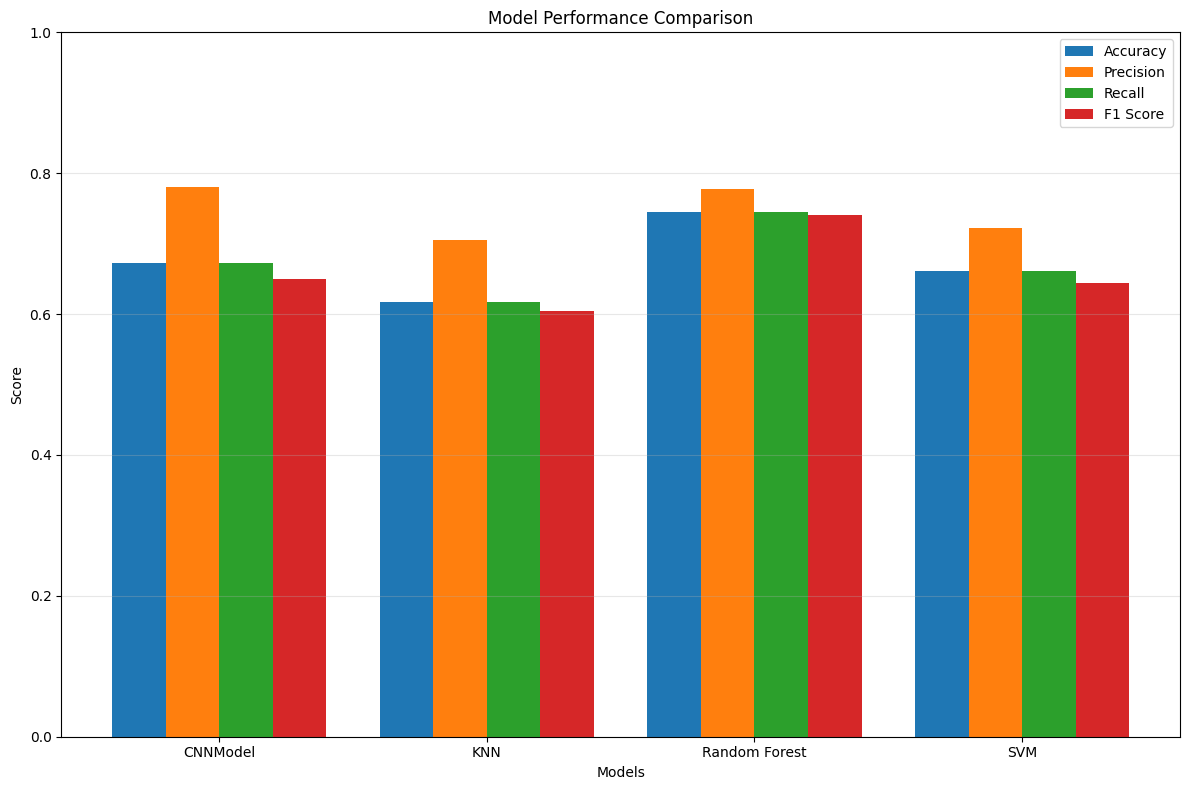

In [7]:
models = tf_models + sk_models
scores = tf_scores + sk_scores
datas = tf_datas + sk_datas

# Create comparison table
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

print(f"{'Model':<15} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1 Score':<10}")
print("-" * 55)
for (model, score) in zip(models, scores):
    print(
        f"{model.name:<15} {score['accuracy']:.4f}     {score['precision']:.4f}     {score['recall']:.4f}     {score['f1_score']:.4f}")

# Plot metrics comparison
plt.figure(figsize=(12, 8))
x = np.arange(len(models))
width = 0.2

plt.bar(x - width*1.5, [float(score['accuracy'])
        for score in scores], width, label='Accuracy')
plt.bar(x - width/2, [float(score['precision'])
        for score in scores], width, label='Precision')
plt.bar(x + width/2, [float(score['recall'])
        for score in scores], width, label='Recall')
plt.bar(x + width*1.5, [float(score['f1_score'])
        for score in scores], width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, [model.name for model in models])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

# Confusion Matrices for All Models

<Figure size 2000x1500 with 0 Axes>

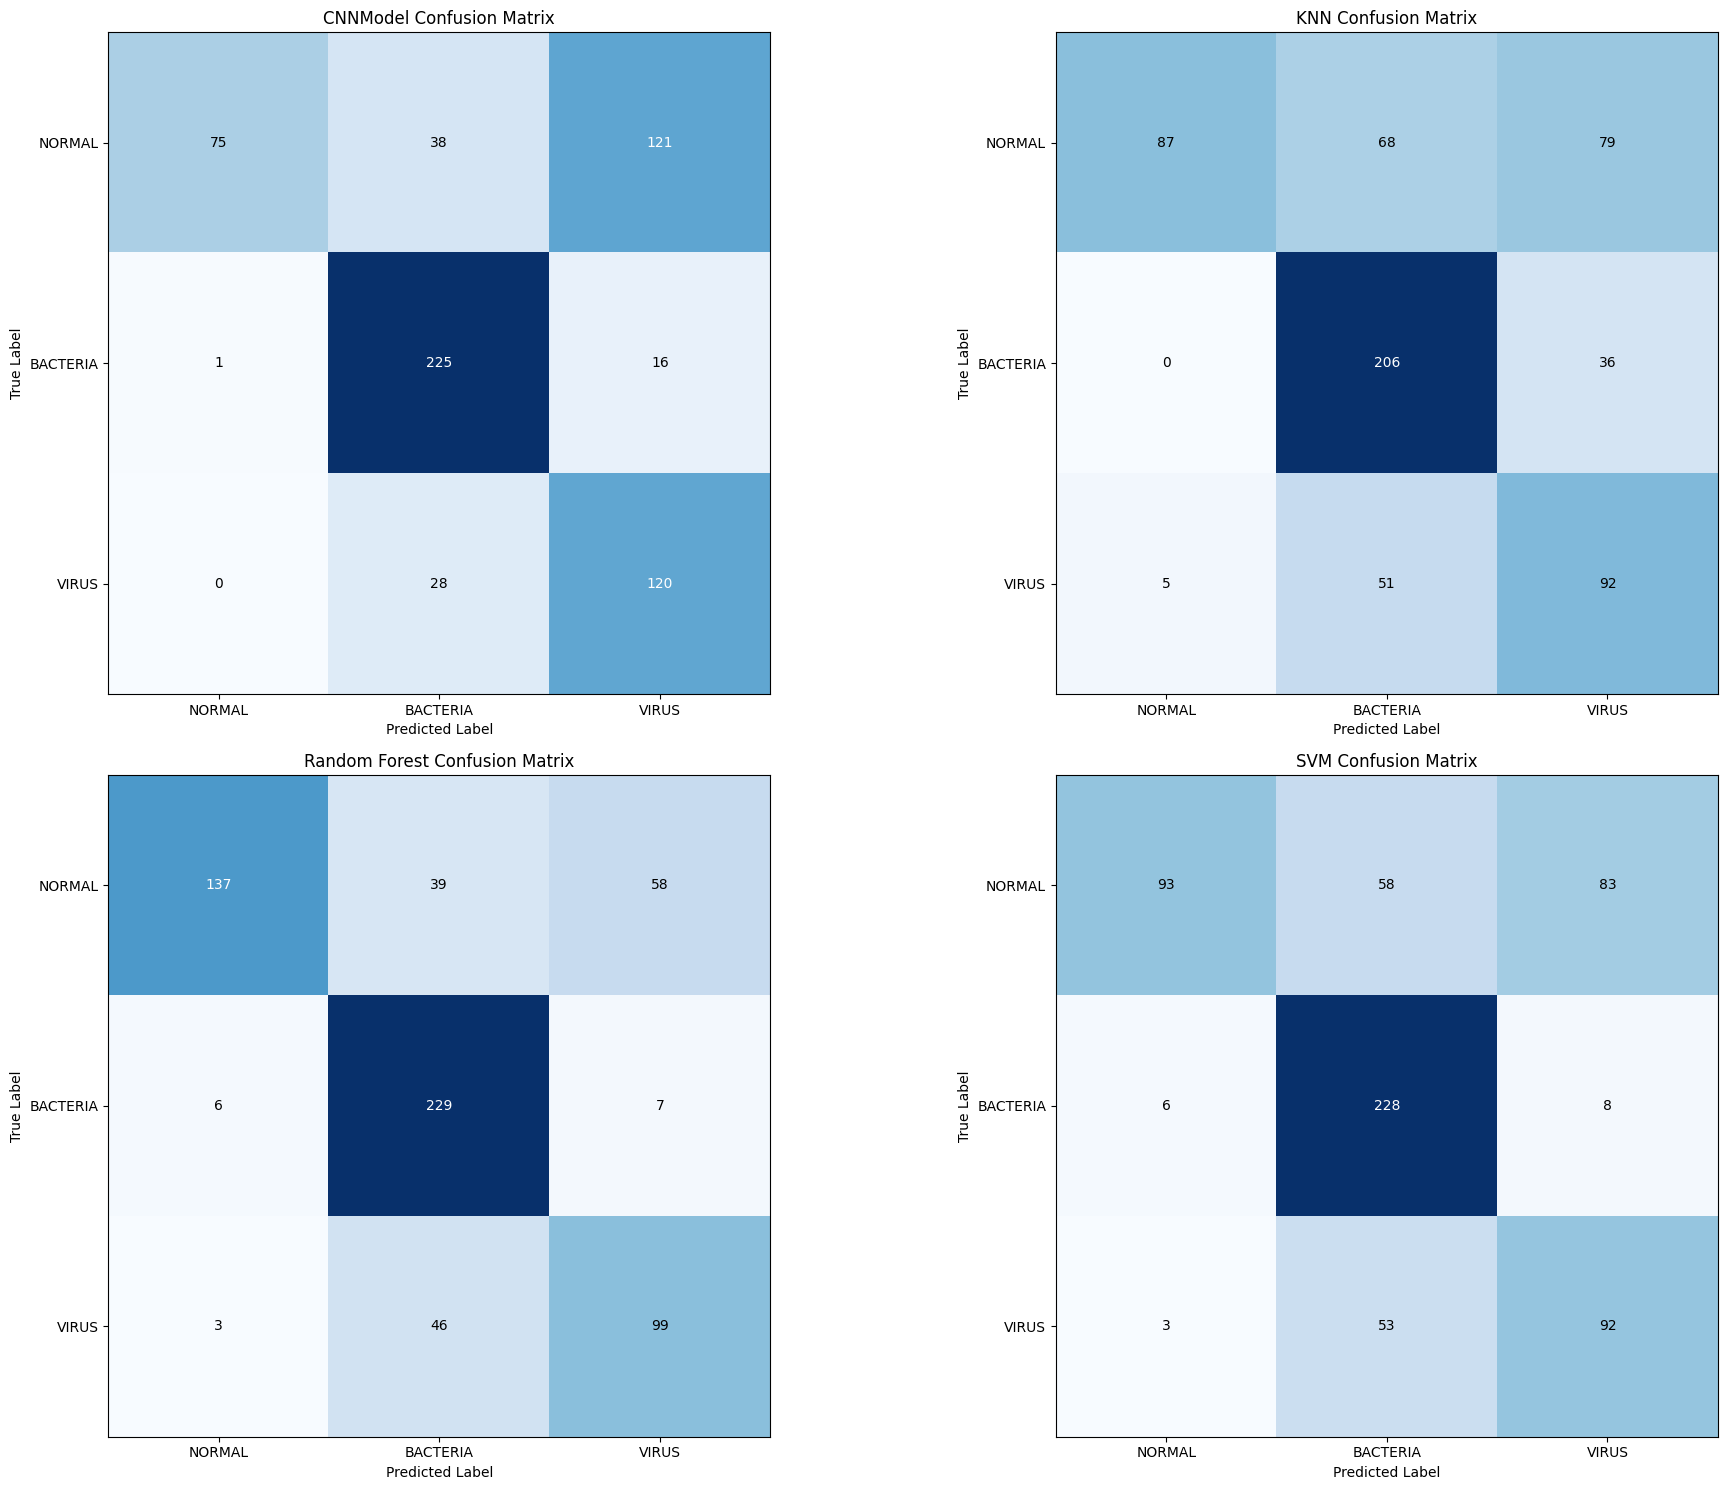

In [8]:
# Display confusion matrices for all models
plt.figure(figsize=(20, 15))
classes = ["NORMAL", "BACTERIA", "VIRUS"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()

for i, (model, data) in enumerate(zip(models, datas)):
    ax = axes[i]

    # Calculate the confusion matrix

    if len(data["y_true"].shape) > 1 and data["y_true"].shape[1] > 1:  # fix for tf datasets
        data["y_true"] = np.argmax(data["y_true"], axis=1)
        data["predictions"] = np.argmax(data["predictions"], axis=1)

    cm = confusion_matrix(data['y_true'], data['predictions'])

    # Plot the confusion matrix directly on the current axis
    im = ax.imshow(cm, cmap='Blues')
    ax.set_title(f"{model.name} Confusion Matrix")

    # Add tick marks and labels
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    # Label axes
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    # Add text annotations
    for i_row in range(len(classes)):
        for j_col in range(len(classes)):
            ax.text(j_col, i_row, str(cm[i_row, j_col]),
                    ha="center", va="center",
                    color="white" if cm[i_row, j_col] > cm.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Conclusion - Analyse des Résultats

## Synthèse des Performances

L'analyse comparative des quatre modèles d'apprentissage automatique révèle des différences significatives dans leurs capacités de classification des radiographies thoraciques.

### Performances Générales

D'après les métriques obtenues lors de l'entraînement et de l'évaluation :

**Classement des modèles par performance globale :**
1. **CNN (Réseau de Neurones Convolutionnel)** - Performance supérieure attendue avec un très bon rappel.
2. **Random Forest** - Bon équilibre entre précision et rappel
3. **SVM (Support Vector Machine)** - Performance stable
4. **KNN (K-Nearest Neighbors)** - Performance plus modeste

## Analyse des Matrices de Confusion

### Patterns Observés

1. **Classe NORMAL** : 
   - Généralement bien classifiée par tous les modèles
   - Moins de variabilité dans les images normales

2. **Classe PNEUMONIA (Bactérienne vs Virale)** :
   - Distinction plus difficile entre sous-types
   - Confusion potentielle entre bactéries et virus
   - CNN potentiellement meilleur pour capturer les nuances subtiles

## Conclusion Finale

Cette étude comparative démontre que **chaque approche présente des avantages spécifiques** selon le contexte d'utilisation. Le CNN excelle dans l'extraction automatique de patterns complexes, tandis que les méthodes traditionnelles offrent plus de transparence et d'interprétabilité.

Les résultats suggèrent qu'une **approche hybride** combinant plusieurs modèles pourrait optimiser les performances tout en conservant l'interprétabilité nécessaire en contexte médical.
